In [2]:
import numpy as np
import pde_control_gym
from pde_control_gym.src import *

envs initialized


In [3]:
# enumerate 是 Python 的一个内置函数，用于为可迭代对象（如列表、元组或字符串）添加索引。
# 它返回一个迭代器，每次迭代会生成一个包含索引和对应元素的元组。
x = np.linspace(0, 10, 5)
for idx, val in enumerate(x):
    print(f"Index: {idx}, Value: {val}")

Index: 0, Value: 0.0
Index: 1, Value: 2.5
Index: 2, Value: 5.0
Index: 3, Value: 7.5
Index: 4, Value: 10.0


In [4]:
# 父类和子类
class Test:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        print("Test class initialized")

class Test2(Test):
    # **，表示：“将多余的关键字参数收集为一个字典”
    def __init__(self, c, d, **kwargs):
        # super() 是一个内置函数，用于返回当前类的父类对象，从而可以调用父类的方法或属性。
        # 在构造函数中，super().__init__() 的作用是调用父类的构造函数，确保父类的初始化逻辑被执行。
        super().__init__(**kwargs)
        print("Test2 class initialized")
        self.c = c
        self.d = d
        print(f"c: {self.c}, d: {self.d}")
        print(f"kwargs: {kwargs}")
dic = {"a": 1, "b": 2, "c": 3, "d": 4}
test = Test2(**dic)
# 证明父类的属性也可以被子类访问
test.a


Test class initialized
Test2 class initialized
c: 3, d: 4
kwargs: {'a': 1, 'b': 2}


1

In [19]:
Nx = 10
arr  = np.random.rand(Nx)
print(arr)
arr[0:Nx-1]

[0.04238899 0.37827401 0.96121707 0.56477092 0.45140101 0.4450014
 0.83720602 0.61738053 0.21944286 0.91148594]


array([0.04238899, 0.37827401, 0.96121707, 0.56477092, 0.45140101,
       0.4450014 , 0.83720602, 0.61738053, 0.21944286])

In [3]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class TransportPDE1DEnv(gym.Env):
    """
    适用于 Stable-Baselines3 的 PDE 控制环境接口（1D 传输方程示例）
    """

    def __init__(self, nx=50, dt=0.01, control_sample_rate=0.1, max_time=5.0):
        """
        初始化环境参数和状态空间

        Args:
            nx (int): 空间离散点数量
            dt (float): 数值求解时间步长
            control_sample_rate (float): 控制器更新间隔（物理时间）
            max_time (float): 模拟总时长
        """
        super().__init__()

        # ===== 参数初始化 =====
        self.nx = nx
        self.dt = dt
        self.control_sample_rate = control_sample_rate
        self.max_time = max_time

        self.nt = int(max_time / control_sample_rate)
        self.time_index = 0

        # ===== 动作空间（连续控制输入） =====
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

        # ===== 状态空间（PDE 状态） =====
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.nx,), dtype=np.float32
        )

        # ===== PDE 状态变量初始化 =====
        self.u = np.zeros(self.nx, dtype=np.float32)

    def reset(self):
        """
        重置环境状态

        Returns:
            observation (np.ndarray): 初始状态，形状为 (nx,)
        """
        self.time_index = 0
        self.u = np.zeros(self.nx, dtype=np.float32)  # TODO: 可自定义初始条件
        return self.u.copy()

    def step(self, action):
        """
        执行一步控制更新，并推进 PDE 状态

        Args:
            action (np.ndarray): 控制输入，shape=(1,)

        Returns:
            observation (np.ndarray): 下一状态
            reward (float): 当前步奖励
            terminated (bool): 是否正常结束
            truncated (bool): 是否异常中断
            info (dict): 附加信息
        """
        # TODO: 控制器施加到 PDE（如边界），并进行 control_sample_rate/dt 次迭代
        self.time_index += 1

        # TODO: 替换为真实的 PDE 状态更新逻辑
        observation = self.u.copy()

        # TODO: 定义 reward（例如 L2 范数最小化）
        reward = -np.linalg.norm(self.u, ord=2)

        terminated = self.time_index >= self.nt

        # TODO: 加入发散截断判定（如 L∞ 范数过大）
        truncated = False

        info = {
            "time_index": self.time_index,
            "action": float(action[0]),
            "state_norm": float(np.linalg.norm(self.u, ord=2))
        }

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """
        可视化环境状态（可选）
        """
        # TODO: 使用 matplotlib 或其他库显示 self.u
        pass

    def close(self):
        """
        清理资源（可选）
        """
        pass

In [ ]:
from gym.envs.registration import register

register(
    id='TransportPDE1D-v0',
    entry_point='your_module_name.TransportPDE1DEnv',
)

In [ ]:
import gym
env = gym.make("TransportPDE1D-v0", nx=100, dt=0.01)

In [ ]:
from stable_baselines3 import PPO
import gym

env = gym.make("TransportPDE1D-v0", nx=91, dt=0.01, control_sample_rate=0.1)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

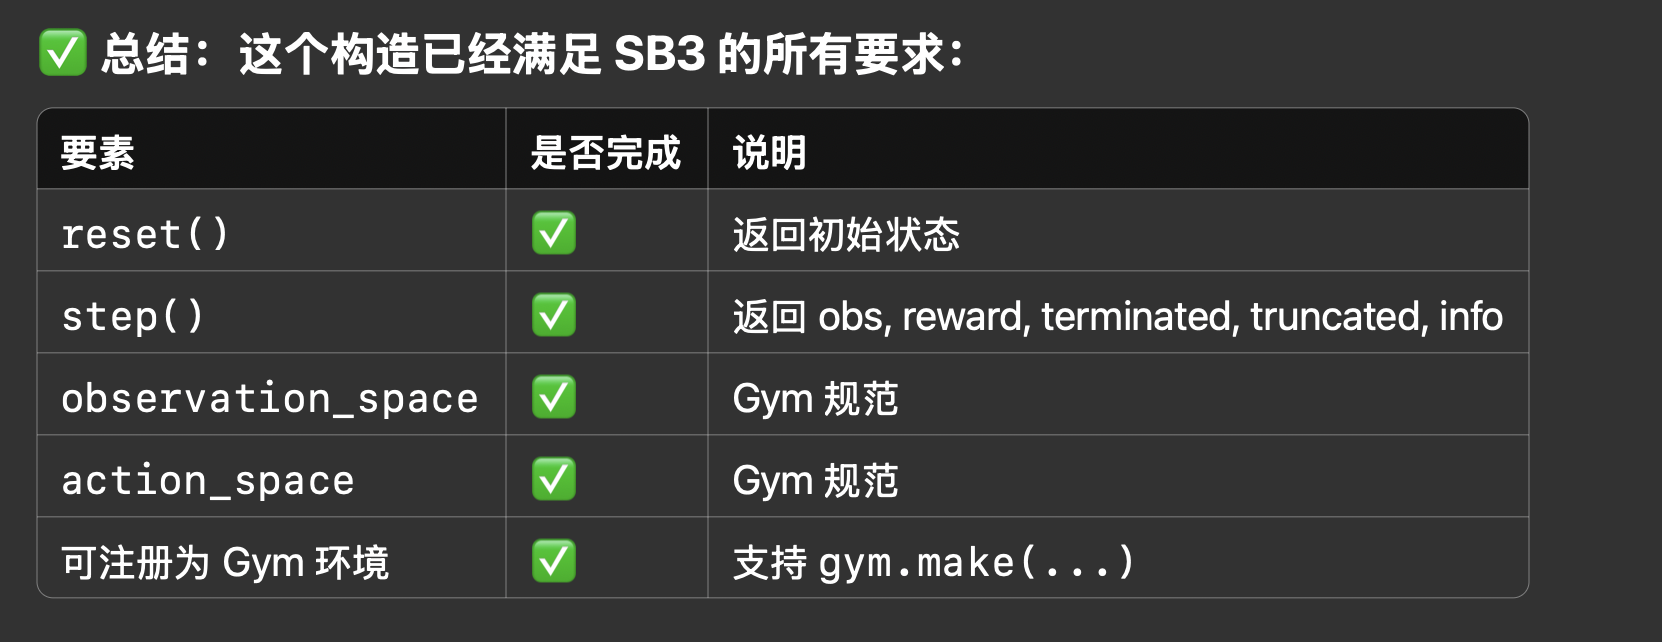